In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Height-Weight Data.csv')

In [3]:
df

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671


In [4]:
df.head(10) 

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971111
8,67.018950,175.929440
9,63.456494,156.399676


In [5]:
df.tail(10)

,Height,Weight
3491,67.269994,171.474446
3492,69.893558,190.100836
3493,73.665274,222.528390
3494,65.528857,184.428199
3495,68.508851,191.395759
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [9]:
df['Weight'].head(10)

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
5    152.212156
6    183.927889
7    167.971111
8    175.929440
9    156.399676
Name: Weight, dtype: float64

In [10]:
df.Height.head(5)

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [11]:
df[1:9]

,Height,Weight
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971111
8,67.018950,175.929440


In [12]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [16]:
df.Height.std()

2.858583328142099

In [17]:
df.Weight.max()

269.9896985

In [18]:
df.shape

(3501, 2)

In [19]:
row,col = df.shape

In [20]:
row

3501

In [21]:
col

2

In [23]:
df.isnull()

,Height,Weight
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
3496,False,False
3497,False,False
3498,False,False
3499,False,False


# visualization

Text(0.5, 1.0, 'yooooooooooooooo')

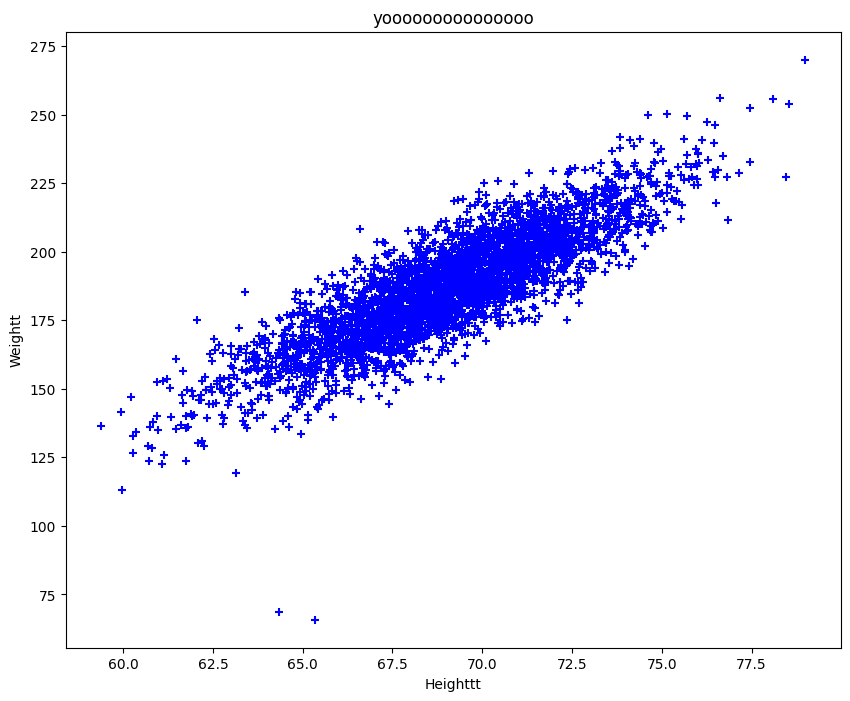

In [26]:
plt.figure(figsize=(10,8))
plt.scatter(df.Height, df.Weight, marker='+' , color='blue')
plt.xlabel('Heighttt')
plt.ylabel('Weightt')
plt.title('yooooooooooooooo')

In [27]:
x=df[['Height']]
y=df[['Weight']]


In [37]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [29]:
y.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


# splite data into train data and test data 

In [41]:
from sklearn.model_selection import train_test_split as tts

In [42]:
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=.30)

In [43]:
xtrain.head()

,Height
3380,68.466211
2666,71.154717
49,72.870360
3167,65.404886
2687,64.838194


In [44]:
ytrain.head()

,Weight
3380,192.533340
2666,190.860975
49,211.342497
3167,176.155549
2687,142.725871


# linear Regression


In [46]:
from sklearn.linear_model import LinearRegression

In [48]:
reg = LinearRegression()

In [49]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [51]:
m = reg.coef_
m

array([[6.00262218]])

In [52]:
c=reg.intercept_
c

array([-227.4187751])

In [55]:
x1=68.466211
y = m * x1 + c

In [56]:
y

array([[183.55802133]])

In [58]:
reg.predict([[68.466211]])

C:\Users\Farhana Sultana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[183.55802133]])

In [59]:
pred= reg.predict(xtest)

In [60]:
pred

array([[190.61262567],
       [146.82500524],
       [214.43553411],
       ...,
       [206.29511646],
       [191.15015244],
       [198.86182626]])

In [61]:
df['Predict result']=reg.predict(x)

In [62]:
df.head()

,Height,Weight,Predict result
0,73.847017,241.893563,215.856967
1,68.781904,162.310473,185.453007
2,74.110105,212.740856,217.436187
3,71.730978,220.042470,203.155187
4,69.881796,206.349801,192.055242


In [63]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [64]:
mse=mean_squared_error(ytest, pred)

In [65]:
mse

100.25115751355861

In [66]:
mae=mean_absolute_error(ytest,pred)

In [67]:
mae

8.000409411267336

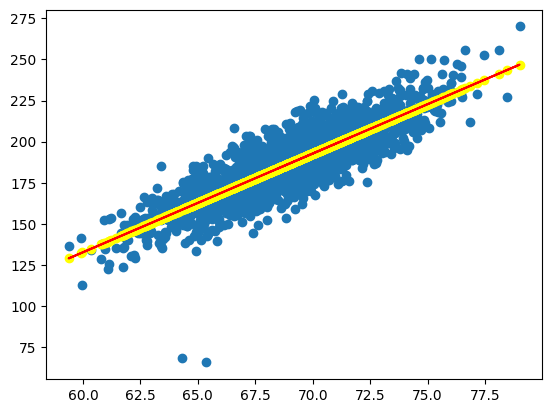

In [68]:
plt.plot(xtrain , reg.predict(xtrain), color = 'red' )
plt.scatter(xtrain, ytrain)
plt.scatter(xtrain, reg.predict(xtrain), color='yellow')

In [69]:
import warnings                   #remove warning
warnings.filterwarnings('ignore') #remove warning
reg.predict([[3000]])

array([[17780.44775154]])